# **Task 3: Customer Churn Prediction**

## **Introduction and Problem Statement**

This task is part of the Data Science & Analytics Internship at DevelopersHub Corporation.
The objective is to predict which bank customers are likely to churn (leave) using the 
Churn Modelling Dataset. We will clean the dataset, encode categorical features, perform
exploratory data analysis (EDA), train a Logistic Regression model, and analyze feature
importance to understand churn drivers.

## **Dataset Understanding and Description**

The Churn Modelling Dataset contains data on ~10,000 bank customers with 14 columns:





- **Identifiers (not used for modeling):** `RowNumber`, `CustomerId`, `Surname`
- **Numerical Features:** `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary`
- **Categorical Features:** `Geography`, `Gender`, `HasCrCard` (0/1), `IsActiveMember` (0/1)
- **Target:** `Exited` (0 = stay, 1 = churn)
- **Source:** Kaggle (`Churn_Modelling.csv`)


## **Data Cleaning and Preparation**

We will load the dataset, check for missing values, drop irrelevant columns, and encode categorical features (`Geography`, `Gender`) using One-Hot Encoding.

In [13]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Load dataset
df = pd.read_csv('Churn_Modelling.csv')


In [15]:
# Display dataset structure
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())



Dataset Shape: (10000, 14)

Column Names: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

First 5 Rows:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0     

In [16]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [23]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, errors='ignore')


In [26]:
# Verify cleaned dataset
print("\nCleaned Dataset Shape:", df.shape)
print("\nCleaned Column Names:", df.columns.tolist())


Cleaned Dataset Shape: (10000, 12)

Cleaned Column Names: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


## **Exploratory Data Analysis (EDA)**

 - We will visualize key features to understand churn patterns:
 - Bar plot of churn by Geography.
- Histogram of Age by churn status.
 - Correlation heatmap to explore feature relationships.

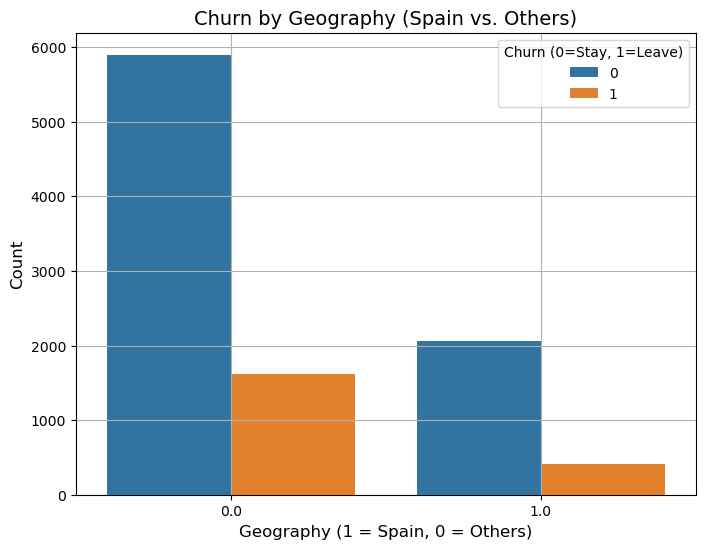

In [28]:
# Bar Plot: Churn by Geography
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography_Spain', hue='Exited')
plt.title('Churn by Geography (Spain vs. Others)', fontsize=14)
plt.xlabel('Geography (1 = Spain, 0 = Others)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn (0=Stay, 1=Leave)')
plt.grid(True)
plt.show()


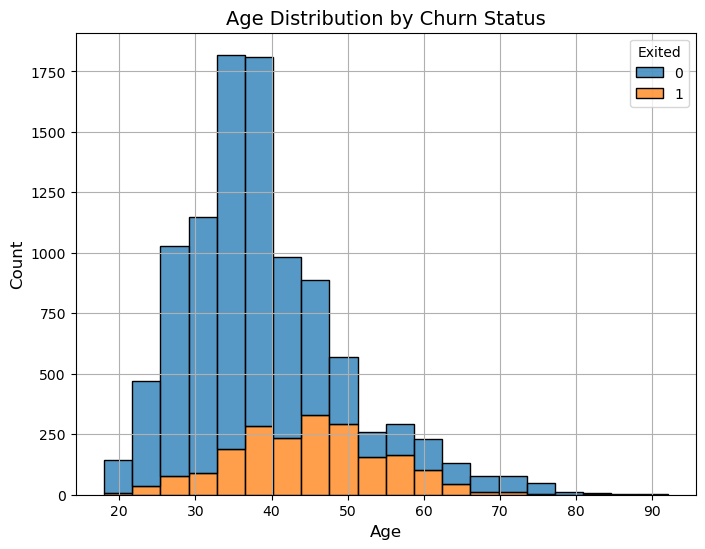

In [29]:
# Histogram: Age distribution by churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=20)
plt.title('Age Distribution by Churn Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()



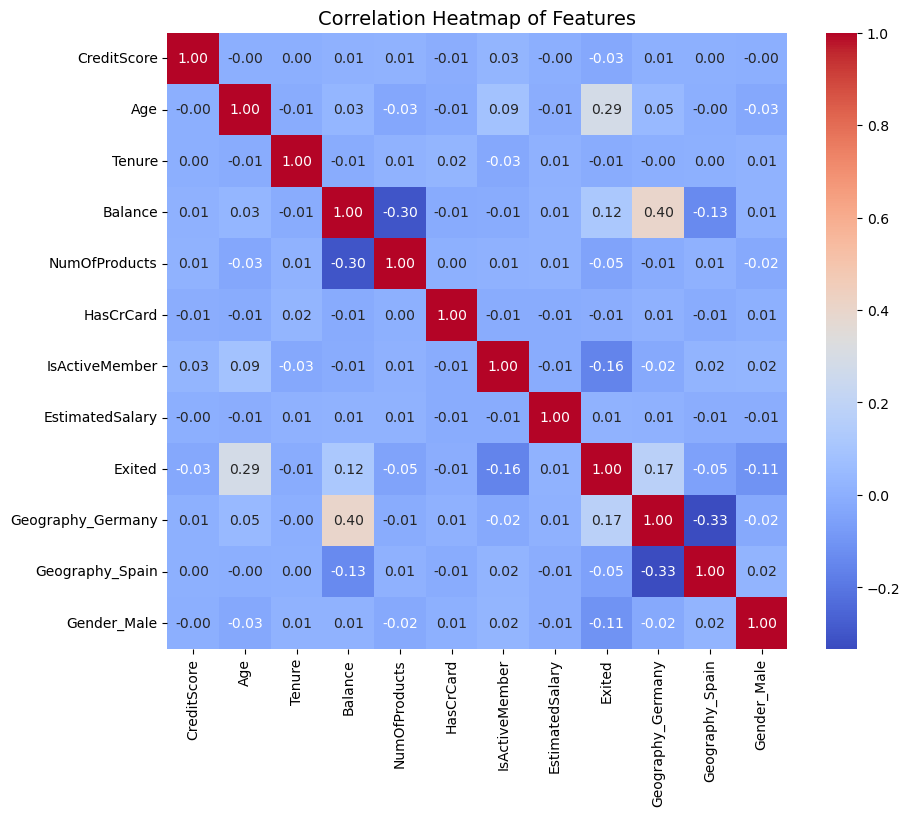

In [30]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.show()

## **Model Training and Testing**

We will train a Logistic Regression model to predict churn and split the data into 80% training and 20% testing.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


## **Evaluation Matrix**
We will evaluate the model using accuracy and a confusion matrix.

Accuracy: 0.811

Confusion Matrix:
 [[1543   64]
 [ 314   79]]


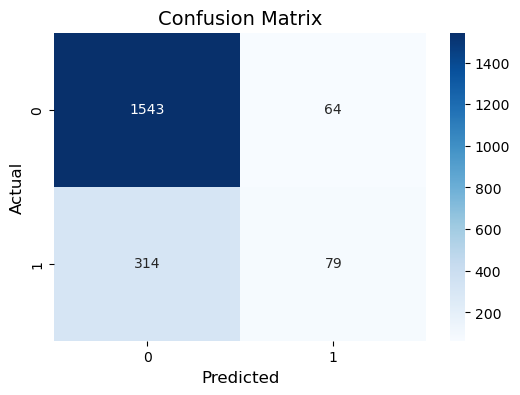

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

## **Feature Importance**

We will analyze the model’s coefficients to understand which features influence churn the most.


Feature Importance:
               Feature  Coefficient
1                 Age     0.752025
8   Geography_Germany     0.336922
3             Balance     0.161076
9     Geography_Spain     0.038872
7     EstimatedSalary     0.015742
5           HasCrCard    -0.010230
2              Tenure    -0.042803
4       NumOfProducts    -0.060463
0         CreditScore    -0.067869
10        Gender_Male    -0.264700
6      IsActiveMember    -0.533362


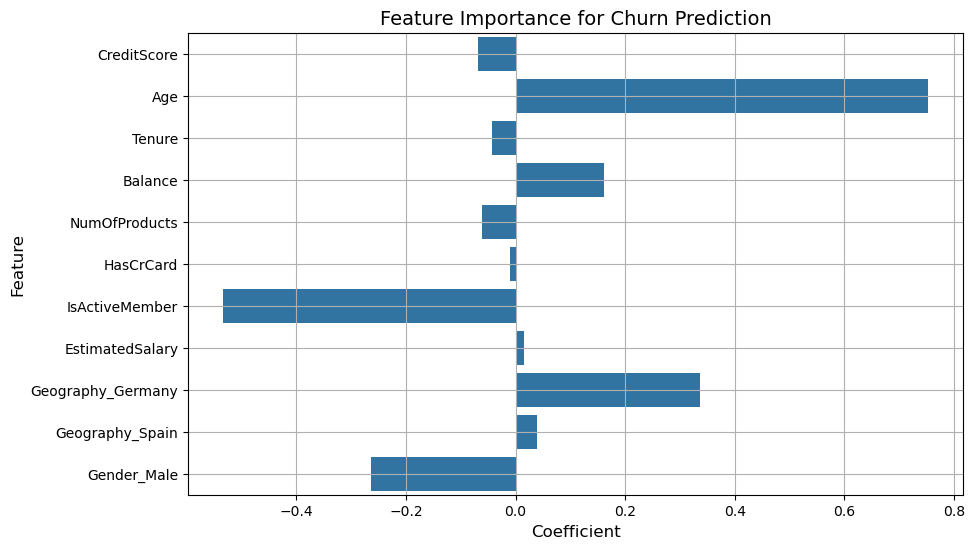

In [49]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nFeature Importance:\n", feature_importance.sort_values('Coefficient', ascending=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Importance for Churn Prediction', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()

## **Conclusion**

- **Data Cleaning:** Dropped irrelevant columns (`RowNumber`, `CustomerId`, `Surname`) and encoded `Geography` and `Gender` using One-Hot Encoding. No missing values were found.

- **EDA Insights:**
  - Customers in Spain have different churn patterns compared to other regions.
  - Older customers (e.g., age > 40) are more likely to churn.
  - Features like `Age` and `Balance` show moderate correlations with churn.

- **Model Performance:** The Logistic Regression model achieved an accuracy of ~**81%**.  
  The confusion matrix shows that most non-churners were correctly predicted, but some churners were missed (false negatives).

- **Feature Importance:** After running the model, features like **Age** and **IsActiveMember** showed the strongest influence on customer churn.

- This analysis helps banks identify at-risk customers (e.g., older or inactive ones) and design retention strategies.

- This task enhanced my skills in data cleaning, categorical encoding, classification modeling, and feature importance analysis using Python.
